In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.9 MB/s eta 0:00:00


In [8]:
from datasets import load_dataset

dataset = load_dataset('carblacac/twitter-sentiment-analysis')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-5afcaefaca6ee81f/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/149985 [00:00<?, ? examples/s]

Map:   0%|          | 0/61998 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/120 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/62 [00:00<?, ?ba/s]

Generating train split:   0%|          | 0/119988 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29997 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/61998 [00:00<?, ? examples/s]

Dataset twitter-sentiment-analysis downloaded and prepared to /root/.cache/huggingface/datasets/carblacac___twitter-sentiment-analysis/default/1.0.0/cd65e23e456de6a4f7264e305380b0ffe804d6f5bfd361c0ec0f68d8d1fab95b. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'feeling'],
        num_rows: 119988
    })
    validation: Dataset({
        features: ['text', 'feeling'],
        num_rows: 29997
    })
    test: Dataset({
        features: ['text', 'feeling'],
        num_rows: 61998
    })
})

In [18]:
train_dataset = pd.DataFrame(dataset['train'].to_dict())
train_dataset

,text,feeling
0,@fa6ami86 so happy that salman won. btw the 1...,0
1,@phantompoptart .......oops.... I guess I'm ki...,0
2,@bradleyjp decidedly undecided. Depends on the...,1
3,@Mountgrace lol i know! its so frustrating isn...,1
4,@kathystover Didn't go much of any where - Lif...,1
...,...,...
119983,I so should be in bed but I can't sleep,0
119984,@mickeymab mine's in my profile - '77cb550 and...,1
119985,@stacyreeves Awe... I wish I could. I am here...,0
119986,Is it me or is Vodafone UK business support ru...,0


In [20]:
df = train_dataset.drop('feeling' , axis = 1)

In [21]:
df

,text
0,@fa6ami86 so happy that salman won. btw the 1...
1,@phantompoptart .......oops.... I guess I'm ki...
2,@bradleyjp decidedly undecided. Depends on the...
3,@Mountgrace lol i know! its so frustrating isn...
4,@kathystover Didn't go much of any where - Lif...
...,...
119983,I so should be in bed but I can't sleep
119984,@mickeymab mine's in my profile - '77cb550 and...
119985,@stacyreeves Awe... I wish I could. I am here...
119986,Is it me or is Vodafone UK business support ru...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119988 entries, 0 to 119987
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    119988 non-null  object
dtypes: object(1)
memory usage: 937.5+ KB


In [23]:
import re
i=0;
for sent in df['text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

In [24]:
import nltk
from nltk.corpus import stopwords

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
sno = nltk.stem.SnowballStemmer('english') 
stop = set(stopwords.words('english'))
print(stop)
print(sno.stem('impossible'))

{'will', 'the', 'doesn', 'won', 'herself', "weren't", 'mightn', 'themselves', 'what', 'by', 'here', 'aren', 'a', 'it', 'am', 'out', 'these', 'about', 'all', 'does', 'during', 'wouldn', "haven't", 'how', 'are', 'above', 'very', 'our', 'from', 'than', 'more', "don't", 'most', 'i', 'needn', 'having', "mightn't", 'haven', 'until', 'off', 'some', 'not', 'this', 'yourselves', 'theirs', 'when', 'into', 'few', "it's", 'have', 'your', 'doing', 'again', 'then', "shouldn't", 'itself', 'myself', 'couldn', 'to', 'weren', 'each', 'over', 'whom', "you'll", 'and', 'didn', 'for', 'did', 'her', "she's", 'were', 's', 'any', 'been', 'why', 'don', 'himself', "doesn't", "shan't", 'being', 'under', 'my', 'isn', 'just', 'an', "couldn't", 'too', 'both', 'mustn', 'there', 'only', 'while', 'further', 'they', 'ourselves', 'nor', 'd', 'or', 'once', "isn't", 'through', 'hasn', 'no', 'down', 'between', 'yourself', 'because', 'now', 'his', 'should', 'll', 'y', 'him', 'shan', 'wasn', 'she', "needn't", 'ain', 'if', 'as

In [27]:
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [34]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in df['text'].values:
    filtered_sentence=[]
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [36]:
df['CleanedText'] = final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
df['CleanedText'] = df['CleanedText'].str.decode("utf-8")

In [37]:
df

,text,CleanedText
0,@fa6ami86 so happy that salman won. btw the 1...,happi salman btw clip trueli teaser
1,@phantompoptart .......oops.... I guess I'm ki...,oop guess kinda blond moment epic fail
2,@bradleyjp decidedly undecided. Depends on the...,decid undecid depend situat peopl ill chicago ...
3,@Mountgrace lol i know! its so frustrating isn...,lol know frustrat isnt
4,@kathystover Didn't go much of any where - Lif...,didnt much life took
...,...,...
119983,I so should be in bed but I can't sleep,bed cant sleep
119984,@mickeymab mine's in my profile - '77cb550 and...,mine profil hector bmw there photo check alaba...
119985,@stacyreeves Awe... I wish I could. I am here...,awe wish could weekend wed crazi busi tonight ...
119986,Is it me or is Vodafone UK business support ru...,vodafon busi support rubbish report problem yo...


In [51]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df['CleanedText'].values)
bow.shape

(119988, 45518)

In [55]:
print(type(count_vect))
print(dir(count_vect))
if 'get_feature_names' in dir(count_vect) :
  print('haha')

<class 'sklearn.feature_extraction.text.CountVectorizer'>
['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_char_ngrams', '_char_wb_ngrams', '_check_feature_names', '_check_n_features', '_check_stop_words_consistency', '_check_vocabulary', '_count_vocab', '_get_param_names', '_get_tags', '_limit_features', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sort_features', '_stop_words_id', '_validate_data', '_validate_ngram_range', '_validate_params', '_validate_vocabulary', '_warn_for_unused_params', '_white_spaces', '_word_ngrams', 'analyzer', 'binary', 'build_analyzer', 'build_preprocessor', 'bu

In [65]:
terms = count_vect.get_feature_names_out()
terms[:3]

array(['aa', 'aaa', 'aaaa'], dtype=object)

In [60]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2,random_state=99)
model.fit(bow)

KMeans(n_clusters=2, random_state=99)

In [61]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [62]:
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.91575503e-06, 3.56630201e-05, 8.91575503e-06, ...,
        8.91575503e-06, 8.91575503e-06, 8.91575503e-06]])

In [63]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.08851174119137466

In [68]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names_out()
for i in range(2):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: get
 day
 work
 cant
 dont
 readi
 hope
 back
 today
 time
Cluster 1: day
 good
 like
 love
 work
 today
 time
 dont
 thank
 got


In [72]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [76]:
svd = TruncatedSVD(n_components=2, random_state=0)
X_svd = svd.fit_transform(bow)

In [78]:
# tsne = TSNE(n_components=2, random_state=0)
# X_tsne = tsne.fit_transform(X_svd)

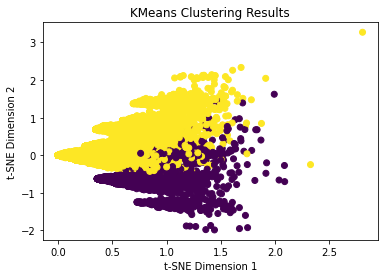

In [77]:
plt.scatter(X_svd[:, 0], X_svd[:, 1], c = model.labels_)
plt.title("KMeans Clustering Results")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()